Template Matching - Simplest form of object detection. It simply scans a larger image for a provided template by sliding the template target image across the larger image

# Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Template Matching

In [2]:
full = cv2.imread('Images/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

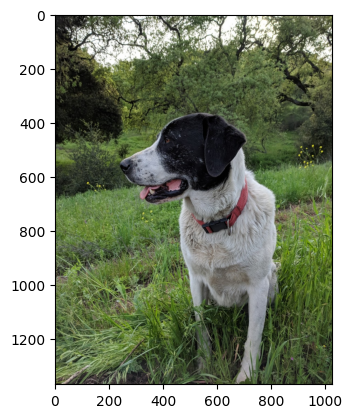

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('Images/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

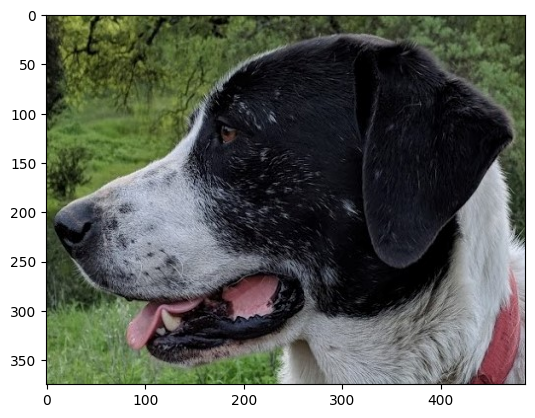

In [5]:
plt.imshow(face)

In [6]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

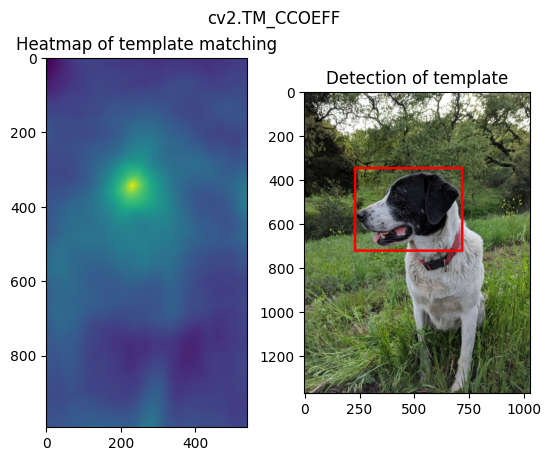

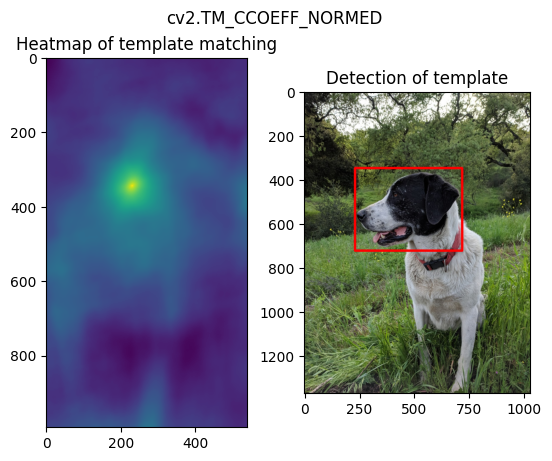

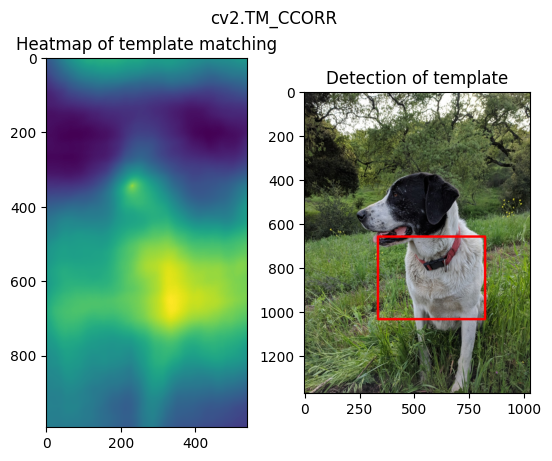

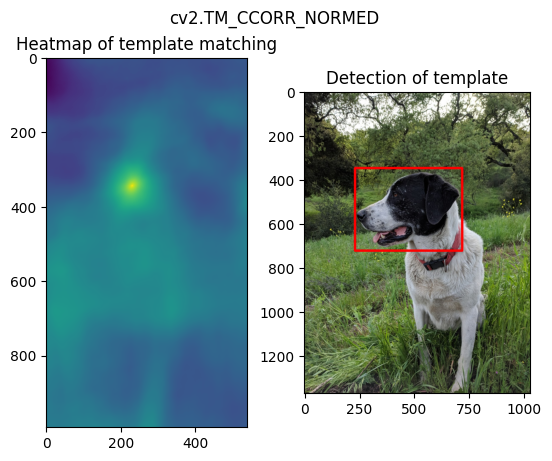

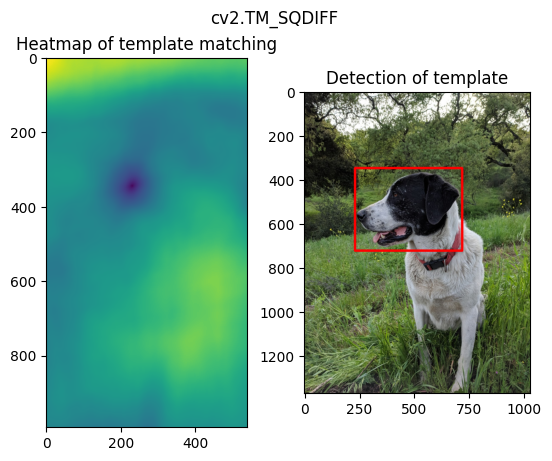

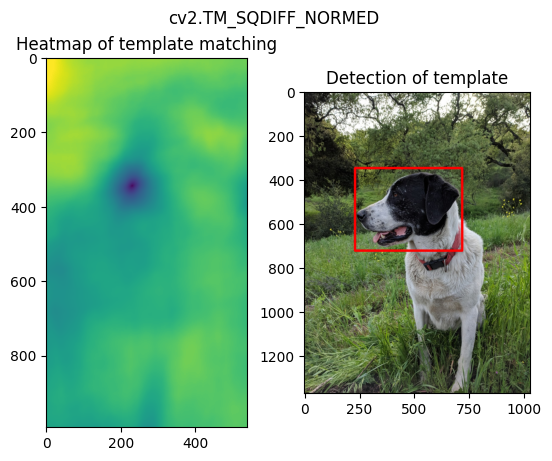

In [7]:
for m in methods:
    full_copy = full.copy()

    method = eval(m)

    res = cv2.matchTemplate(full_copy, face, method=method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        topLeft = min_loc
    else:
        topLeft = max_loc

    height, width, channels = face.shape

    bottomRight = (topLeft[0] + width, topLeft[1] + height)

    cv2.rectangle(full_copy, topLeft, bottomRight, (255,0,0), 10)

    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    plt.suptitle(m)

    plt.show()
    print('\n')
    print('\n')

# Corner Detection

* Harris Corner Detection - basic intuition is that corners can be detected by looking for significant change in all directions.
* Shi-Tomasi Corner Detection - It changes the scoring function selection criteria that Harris uses for corner detection.

In [8]:
flat_chess = cv2.imread('Images/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

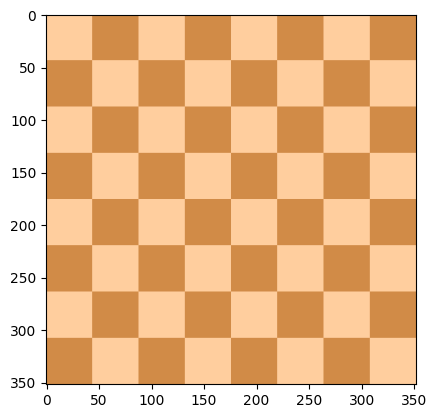

In [9]:
plt.imshow(flat_chess)

In [10]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

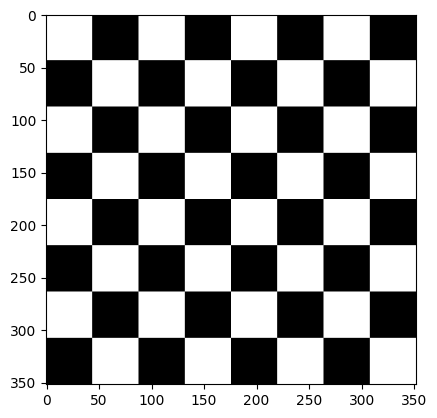

In [11]:
plt.imshow(gray_flat_chess, cmap='gray')

In [12]:
real_chess = cv2.imread('Images/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

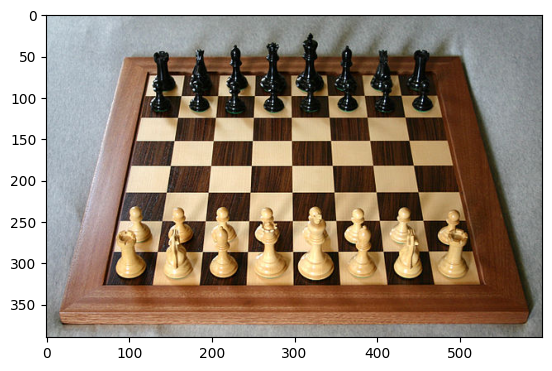

In [13]:
plt.imshow(real_chess)

In [14]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

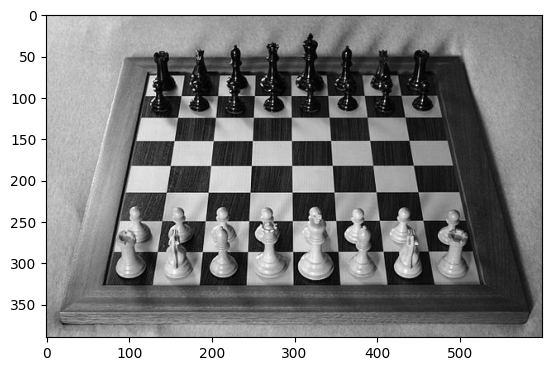

In [15]:
plt.imshow(gray_real_chess, cmap='gray')

In [16]:
gray = np.float32(gray_flat_chess)

In [17]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [18]:
dst = cv2.dilate(dst, None)

In [19]:
flat_chess[dst>0.01*dst.max()] = [255, 0, 0]

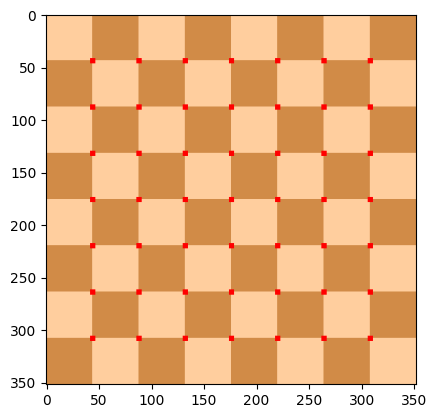

In [20]:
plt.imshow(flat_chess)

In [21]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [22]:
dst = cv2.dilate(dst, None)

In [23]:
real_chess[dst>0.01*dst.max()] = [255, 0, 0]

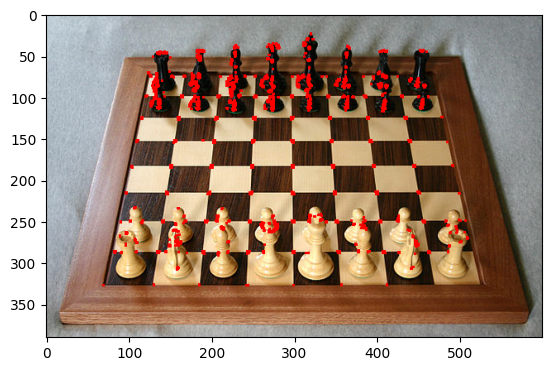

In [24]:
plt.imshow(real_chess)

In [39]:
flat_chess = cv2.imread('Images/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('Images/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

In [40]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

In [41]:
corners = np.int0(corners)

/var/folders/bb/1pgmng2s0xl2b26dxfj33phm0000gn/T/ipykernel_16302/929114271.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [42]:
for i in corners: 
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

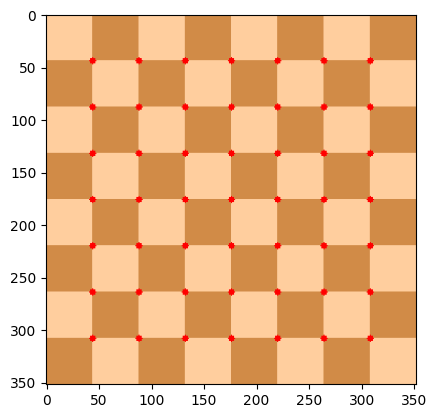

In [43]:
plt.imshow(flat_chess)

In [48]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.01, 10)

In [49]:
corners = np.intp(corners)

In [50]:
for i in corners: 
    x,y = i.ravel()
    cv2.circle(gray_real_chess, (x,y), 3, (255,0,0), -1)

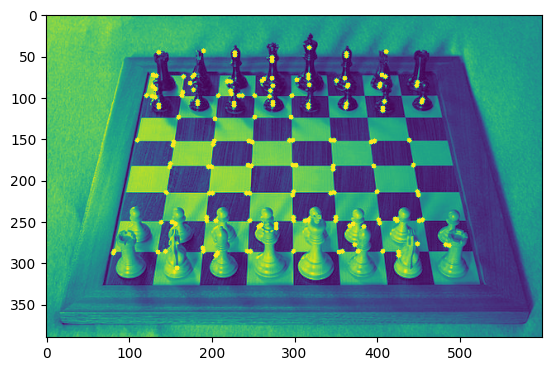

In [51]:
plt.imshow(gray_real_chess)

# Edge Detection

Canny edge detection process:
* Apply Gaussian filter to smooth the image in order to remove the noise
* Find the intensity gradients of the image
* Apply non-maximum suppression to get rid of spurious response to edge detection
* Apply double threshold to determine potential edges
* Track edge by hysteresis: Filter weaker edges

For high res images, it is usually good to apply a custom blur before applying the Canny algorithm.

Keep in mind: The Canny algorithm also requires a user to decide on low and high threshold values

In [52]:
face = cv2.imread('Images/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

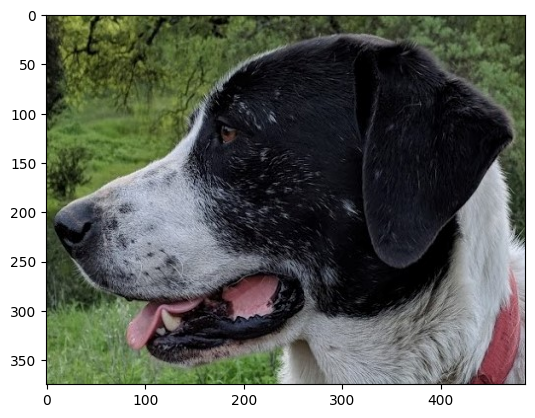

In [53]:
plt.imshow(face)

In [54]:
edges = cv2.Canny(image=face, threshold1=127, threshold2=127)

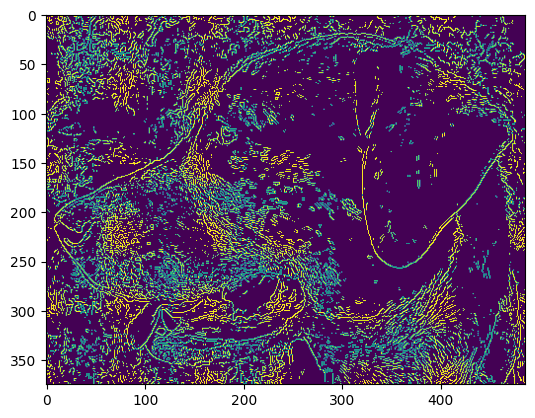

In [55]:
plt.imshow(edges)

In [56]:
med_val = np.median(face)

In [57]:
med_val

64.0

In [58]:
lower = int(max(0, 0.7*med_val))
upper = int(min(255, 1.3*med_val))

In [59]:
edges = cv2.Canny(image=face, threshold1=lower, threshold2=upper)

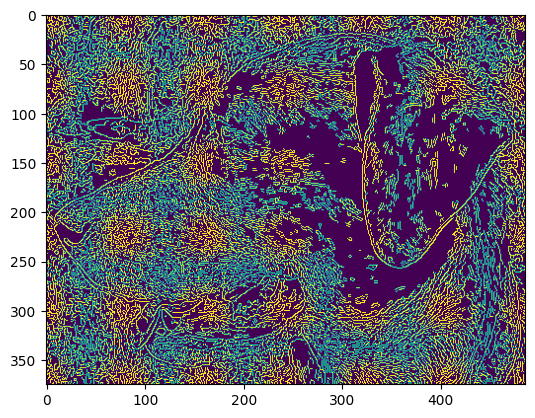

In [60]:
plt.imshow(edges)

In [61]:
blurred_img = cv2.blur(face, ksize=(5,5))

In [62]:
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper)

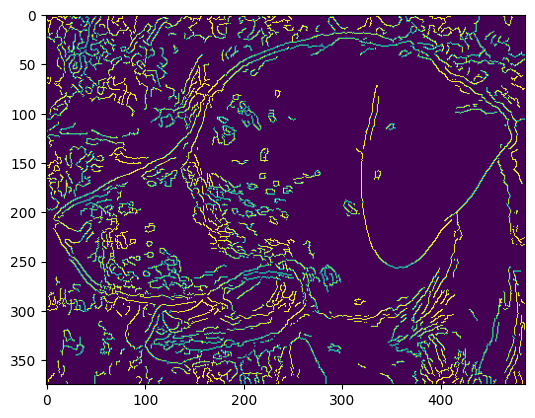

In [63]:
plt.imshow(edges)